In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# 修改默认字体
font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal'}
plt.rc('font', **font)
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

In [3]:
# 定义全局变量
miu = 0.011
g = 9.8
m_ren=70
m_che=7
m = m_ren + m_che
r = 0.66   # 车轮半径
c = 0.25   # 一个未知系数
w_shoulder = 0.46    # 肩宽
l_leg = 1.0        # 腿长
s = w_shoulder * l_leg   # 人加车正对面积
rou = 1.205   # kg/m^3

sigma1 = 42 # 表示有氧呼吸的速率  # sigma2表示无氧呼吸的速率，以函数形式给出

W_max = 2403.5e3  # 最大的功率
alpha = 0.1   # 一个比率

In [4]:
# 阻力函数
f1 = miu*m*g/(2*r)

def f2(v):
    return 1/2*c*rou*s*v*v

def f_zu(v):
    return f1 + f2(v)

def sigma2(P):       # P是人体功率， v是当前速度
    if P < sigma1:
        return 0
    else:
        return P - sigma1 

# P功率最大维持时间
def T(P):
    return W_max / ( (2.38969595e-06*(P-sigma1)**3+3.2) *P)

# 添加k的时间
def T_new(P,k):
    return W_max / ( (2.38969595e-06*( (P-sigma1)/(1-k) )**3+3.2) *( (P-sigma1)/(1-k)+sigma1) )

# 要休息的时间
def T_rest(P):
    return (P-139) /97 * T(P)


In [5]:
k_test = np.linspace(0,0.9,10)
p_test = np.linspace(43,700,100)

yy=[]
color=["#ff0000","#ff8c00","#ffd700","#f0e680","#adff2f","#00ffff","#40e0d0","#00bfff","#1e90ff","#0000ff","#191970"]
for i in range(len(k_test)):
    t_new = T_new(p_test,k_test[i])
    yy.append(t_new)

# 要休息的时间
tr=T_rest(p_test)       

In [6]:
# 每个挡位能坚持的时间
p_dw_time=[]
for i in range(len(pp_temp)):
    p_dw_time.append(math.floor(T(pp_temp[i])))
# 每个挡位需要休息的时间
p_dw_tr = [math.floor(T_rest(i)) for i in pp_temp]
p_dw_tr[0]=0
p_dw_tr[1]=0

# print(p_dw_tr)

# 每个挡位需要的总时间
p_dw_t_all = np.asarray(p_dw_time) + np.asarray(p_dw_tr)
print(p_dw_time,p_dw_tr,p_dw_t_all)                                                   

NameError: name 'pp_temp' is not defined

2
2
4
5
5
6
6
7
7
7
0


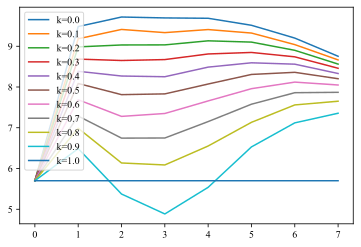

In [7]:
# 初始化挡位
dangwei=[]
for i in range(10000):
    dangwei.append(random.randint(1,7))


p_dw=[]
pp_temp=np.asarray([42,100,200,300,400,500,600,700])

p_dw_time = [17883, 600, 951, 181, 53, 20, 9, 5] 
p_dw_tr = [0, 1, 297, 120, 62, 43, 36, 34] 
p_dw_t_all = np.asarray(p_dw_time)  + np.asarray(p_dw_tr)



# p_dw矩阵初始化
for i in range(10):
    kkk = 0.1 * i
    p_dw.append( np.round((pp_temp-42)*(1-kkk) + 42,0) )
# print(p_dw)
v_dw=[
    [5.7,9.1,12.5,14.8,16.5,18.0,19.4,20.4],
    [5.7,8.8,12.1,14.2,15.9,17.4,18.6,19.7],
    [5.7,8.6,11.6,13.7,15.3,16.7,17.9,18.9],
    [5.7,8.3,11.1,13.1,14.6,15.9,17.1,18.1],
    [5.7,8.0,10.6,12.4,13.9,15.1,16.2,17.1],
    [5.7,7.7,10.0,11.7,13.0,14.2,15.2,16.1],
    [5.7,7.3,9.3,10.9,12.1,13.1,14.0,14.9],
    [5.7,6.9,8.6,9.9,11.0,11.9,12.7,13.5],
    [5.7,6.6,7.8,8.8,9.7,10.5,11.2,11.8],
    [5.7,6.1,6.8,6.8,7.5,8.6,9.0,9.5],
    [5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7]
]
v_a = v_dw
for kkk in range(0,10):
    kkk /= 10
    for i in range(1,8):
        v_a[int(kkk*10)][i] = (p_dw_time[i] * v_dw[int(kkk*10)][i] + 42 * 5.7) / (p_dw_time[i] + p_dw_tr[i])
# print(v_a)

p_bt_k = [2,2,4,5,5,6,6,7,7,7]  # k为0-0.9时的最佳挡位

for i in range(len(v_a)):
    plt.plot(v_a[i],label="k="+str(i/10 ))
    print(v_a[i].index(max(v_a[i])))
plt.legend()
plt.show()

In [35]:

times = 1   # 尝试变换次数
t_all = [] # 记录每次中的到达终点需要的t
t_best = 30000

dw_best = dangwei.copy() #记录目前效果最好的dangwei数组
tem_alpha = 0.99
tem = 0.00000001       # 初始温度

# 转弯矩阵
turn = []
v_limit = 1
# 坡度矩阵
slope = [0,	2.7, 4.9, 10.3, 15.5, 17.5, 22.1, 24.8, 27, 32.4, 37.6, 39.6, 44.2]
slope_angle = [-0.036296296, -0.017272727, 0.040925926,	-0.033846154, 0.045, 0.000217391,
	-0.036296296,  -0.017272727,   0.040925926,  -0.033846154,  0.045,  0.000217391]



best_t=[]    # 时间
best_v=[]    # 速度
best_p=[]    # 功率
best_x=[]    # 路程
best_f=[]    # 阻力
best_k=[]    # 记录取整的k
best_E=[]    # 消耗的能量

for iii in range(times): # 尝试搜times次
    tem *= tem_alpha
    dangwei = dw_best.copy()   # 确认现在的挡位选择为当前最优
    #  确定dangwei_len
    dangwei_len=0
    time_all=0
    for jjj in range(10000):
        # print(jjj,time_all)
        time_all += p_dw_t_all[dangwei[jjj]]
        if time_all >= 20000:
            dangwei_len = jjj+1
            break


    # 随机出一个dangwei数组，长度500
    rrr = random.randint(1,dangwei_len-1)   # dangwei数组位置
    while True:
        rrrr = random.randint(1,7)              # 第rrr个位置换成 随机1-7之间的rrrr
        if dangwei[rrr]==rrrr:
            continue
        else:
            dangwei[rrr] = rrrr
            break


    # if rrr%2:   # rrr应该小于前一个，不等于后一个
    #     choice= [i for i in range(1,dangwei[rrr-1])]
    #     if dangwei[rrr+1] in choice:
    #         choice.remove(dangwei[rrr+1])
    #     length = len(choice)
    #     if length==0:
    #         continue
    #     else:
    #         rrrr = random.randint(0,length-1)
    #         dangwei[rrr] = choice[rrrr]
    # else:       # rrr应该大于后一个，不等于前一个
    #     choice = [i for i in range(dangwei[rrr+1]+1,8)]
    #     if dangwei[rrr-1] in choice:
    #         choice.remove(dangwei[rrr-1])
    #     length = len(choice)
    #     if length==0:
    #         continue
    #     else:
    #         rrrr = random.randint(0,length-1)
    #         dangwei[rrr] = choice[rrrr]


    # 初始化  目前不需要休息时间
    flag=1      #  判断结束后退出的标志
    j = 0  # 标志挡位改变的标记

    t=[]    # 时间
    v=[]    # 速度
    p=[]    # 功率
    x=[]    # 路程
    f=[]    # 阻力
    k=[]    # 记录取整的k
    E=[]    # 消耗的能量
    kk=[]   # 记录未取整的k
    sigma=[]

    # 添加初始值
    kk.append(0)
    t.append(0)
    v.append(0)
    k.append(0)

    mengdw =2
    p_new = p_dw[int(k[0]/0.1)][2]
    p.append(p_new)
    x.append(0)
    f.append(f1)

    E.append(0)

    sigma.append(sigma2(p[0]))

   
    stay = p_dw_time[2]  # 该挡位可持续时间
    stay2= p_dw_t_all[2] # 加上所需42W休息时间
    # 开始迭代
    for i in range(1,100000):
        t_temp = t[i-1]+1;  t.append(t_temp)
        # 确定此时的P
        if i<=stay:
            if random.random() < 0.7:
                mengdw = p_bt_k[int(k[i-1]*10)]
            else:
                mengdw = random.randint(1,7)

            p_temp = p_dw[int(k[i-1]/0.1)][mengdw]
        elif i >stay and i < stay2:
            p_temp = sigma1
        elif i==stay2:
            if random.random() < 0.7:
                mengdw = p_bt_k[int(k[i-1]*10)]
            else:
                mengdw = random.randint(1,7)
            p_temp = p_dw[int(k[i-1]/0.1)][mengdw]
            p_new = p_dw[int(k[i-1]/0.1)][mengdw]
            j+=1  # 下次取下一个挡位
            stay = stay2 + p_dw_time[mengdw]
            stay2 = stay2 + p_dw_t_all[mengdw]


        k_temp = (E[i-1] / 2e6); 
        if k_temp < 0.991:
            k.append(k_temp//0.1 /10); 
        else:
            k.append(0.99)

            # kk.append(k_temp)

        p.append(p_temp)

        v_temp = math.sqrt( 2*(p[i-1]-f[i-1]*v[i-1])/m + v[i-1]**2 )
        x_temp = x[i-1] + (v[i-1] + v_temp)/2 
        if len(turn)>0:
            if x_temp>=turn[0][1]:
                del turn[0]
            elif x_temp >= turn[0][0] and x_temp <turn[0][1]:
                v_temp = v_limit
                x_temp = x_temp = x[i-1] + (v[i-1] + v_temp)/2

        v.append(v_temp)
        x.append(x_temp)
        f_temp = f_zu(v[i]) + 5;    f.append(f_temp)
        E_temp = E[i-1] + p[i-1] - sigma1;  E.append(E_temp)



        # print('时刻i: ', i, ' stay=',stay, ' t=',t[i],' p=',p[i],' v=',v[i],' x=',x[i],' f=',f[i],' E=',E[i],' k=',k[i])
        # print('时刻i: ', i, ' stay=',stay, ' dw=',dangwei[j],' p=',p[i],' x=',x[i],' k=',k[i])

        if(x_temp>140000 and flag):
            t_all.append(i)
            # print(i/3600) # 打印小时数
            if i < t_best:
                t_best = i
                dw_best = dangwei.copy()
                best_t=t.copy()    # 时间     
                best_v=v.copy()    # 速度     
                best_p=p.copy()    # 功率     
                best_x=x.copy()    # 路程     
                best_f=f.copy()    # 阻力     
                best_k=k.copy()    # 记录取整的k   
                best_E=E.copy()    # 消耗的能量       
            break
            # else:   # 模拟退火
            #     p_simulated=math.exp(-abs(i-t_best)/tem)
            #     # print(abs(fsig_temp-fsig_last),p_simulated)
            #     if random.random()<p_simulated:
            #         t_best = i
            #         dw_best = dangwei.copy()
    
        print('时刻i: ', ' t=',t[i],' ae=',stay,' re=',stay2,' p=',p[i],' dw=',mengdw,' x=',x[i],' k=',k[i])
    # if iii%100==0:
    #     print("第",iii,"次，  交换第",rrr,"个，  目前到达终点时间",t_all[iii]/3600,"，  最优时间",t_best/3600)

时刻i:   t= 1  ae= 951  re= 1248  p= 200.0  dw= 2  x= 1.1396057645963795  k= 0.0
时刻i:   t= 2  ae= 951  re= 1248  p= 200.0  dw= 2  x= 3.8364550403566087  k= 0.0
时刻i:   t= 3  ae= 951  re= 1248  p= 200.0  dw= 2  x= 7.2596625735710205  k= 0.0
时刻i:   t= 4  ae= 951  re= 1248  p= 200.0  dw= 2  x= 11.243074270926503  k= 0.0
时刻i:   t= 5  ae= 951  re= 1248  p= 200.0  dw= 2  x= 15.692408114996729  k= 0.0
时刻i:   t= 6  ae= 951  re= 1248  p= 200.0  dw= 2  x= 20.543995812423386  k= 0.0
时刻i:   t= 7  ae= 951  re= 1248  p= 700.0  dw= 7  x= 25.750819316753024  k= 0.0
时刻i:   t= 8  ae= 951  re= 1248  p= 200.0  dw= 2  x= 31.799831416499515  k= 0.0
时刻i:   t= 9  ae= 951  re= 1248  p= 200.0  dw= 2  x= 38.62169013511275  k= 0.0
时刻i:   t= 10  ae= 951  re= 1248  p= 200.0  dw= 2  x= 45.633244191663444  k= 0.0
时刻i:   t= 11  ae= 951  re= 1248  p= 200.0  dw= 2  x= 52.82221130334553  k= 0.0
时刻i:   t= 12  ae= 951  re= 1248  p= 500.0  dw= 5  x= 60.17749330296344  k= 0.0
时刻i:   t= 13  ae= 951  re= 1248  p= 200.0  dw= 2  x=

In [ ]:
# p_dw[int(k[0]/0.1)][dangwei[j]]
print(len(t_all),t_best,dw_best)

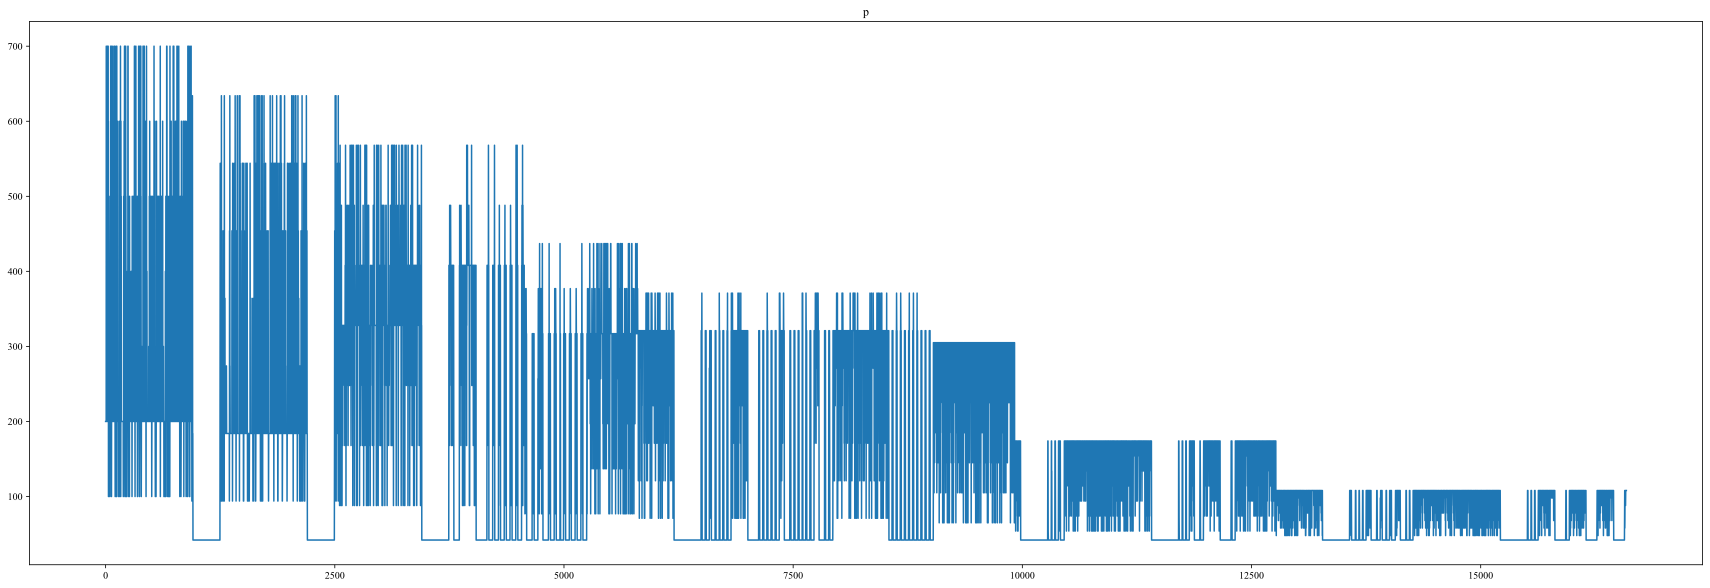

16590 16590


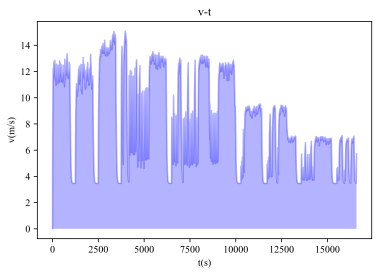

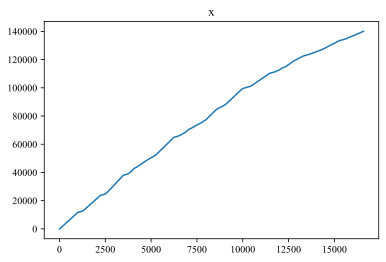

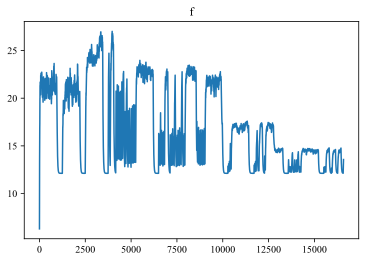

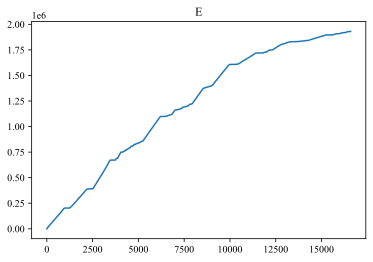

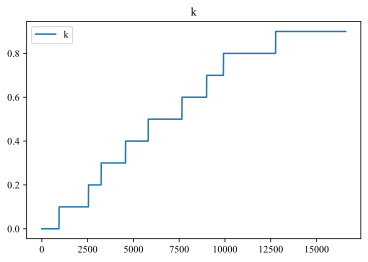

In [61]:
# 绘图
plt.figure(figsize=(30,10))
plt.plot(best_t,best_p)
plt.title("p")
plt.show()

plt.plot(best_t,best_v,color='b',alpha=0.3)
plt.title("v-t")
y2=0 * np.asarray(best_t)
print(len(y2),len(best_v))
plt.fill_between(best_t,best_v,y2,facecolor="blue",alpha=0.3)
plt.xlabel("t(s)")
plt.ylabel("v(m/s)")
plt.show()

plt.plot(best_t,best_x)
plt.title("x")
plt.show()

plt.plot(best_t,best_f)
plt.title("f")
plt.show()

plt.plot(best_t,best_E)
plt.title("E")
plt.show()

plt.plot(best_t,best_k,label='k')
# plt.plot(t,kk,label="k'")

plt.title("k")
plt.legend()
plt.show()


In [58]:
# 试出一个合理的挡位调节序列


# s=[2]
# p=[200]
# E=0
# E = (p[0]-sigma1) * p_dw_time[s[0]]
# k = E / 2e6
# for i in range(1000):
#     s.append(p_bt_k[int(k*10)])
#     p.append(p_dw[int(k*10)][s[i]])
#     E += (p[i] - sigma1) * p_dw_time[s[i]]
#     k = E/2e6
#     # if k >0.9:
#     #     break
# print(len(s),s)

1001 [2, 2, 2, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7